In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from drawarrow import ax_arrow
import matplotlib.patheffects as path_effects

In [2]:
answers = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/main/data/2025/2025-07-08/answers.csv')
color_ranks = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/main/data/2025/2025-07-08/color_ranks.csv')
users = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/main/data/2025/2025-07-08/users.csv')

In [3]:
answers.head(2)

,user_id,hex,rank
0,1,#8240EA,1
1,2,#4B31EA,3


In [4]:
color_ranks.head(2)

,color,rank,hex
0,purple,1,#7e1e9c
1,green,2,#15b01a


In [5]:
users.head(2)

,user_id,monitor,y_chromosome,colorblind,spam_prob
0,1,LCD,1.0,0.0,0.002088
1,2,LCD,1.0,0.0,0.074577


In [6]:
answers["hex"] = answers["hex"].str.lower()
color_ranks["hex"] = color_ranks["hex"].str.lower()

In [7]:
merged = pd.merge(answers, color_ranks, on="hex", suffixes=("_answer", "_color"))

In [8]:
df = pd.merge(merged, users, on="user_id")

In [9]:
df = df.sort_values(by="rank_answer")

In [10]:
# Calculate cumulative count (starting at 1) by group
df["y"] = df.groupby("rank_answer").cumcount() + 1

In [11]:
df

,user_id,hex,rank_answer,color,rank_color,monitor,y_chromosome,colorblind,spam_prob,y
1,5970,#490648,1,deep violet,517,LCD,1.0,0.0,0.039612,1
5,26976,#ac1db8,1,barney,432,CRT,0.0,0.0,0.291466,2
31,103519,#8f8ce7,1,perrywinkle,587,LCD,1.0,0.0,0.250772,3
2,11579,#548d44,2,fern green,630,LCD,1.0,0.0,0.092284,1
3,21723,#7f8f4e,2,camo,848,LCD,1.0,0.0,0.120952,2
4,25397,#96f97b,2,light green,10,LCD,1.0,0.0,0.193542,3
10,45969,#8ee53f,2,kiwi green,905,LCD,1.0,0.0,0.132864,4
0,4549,#9cbb04,2,bright olive,657,LCD,0.0,0.0,0.227916,5
15,58827,#11875d,2,dark sea green,417,LCD,0.0,0.0,0.154626,6
24,84836,#96b403,2,booger green,802,LCD,1.0,0.0,0.031235,7


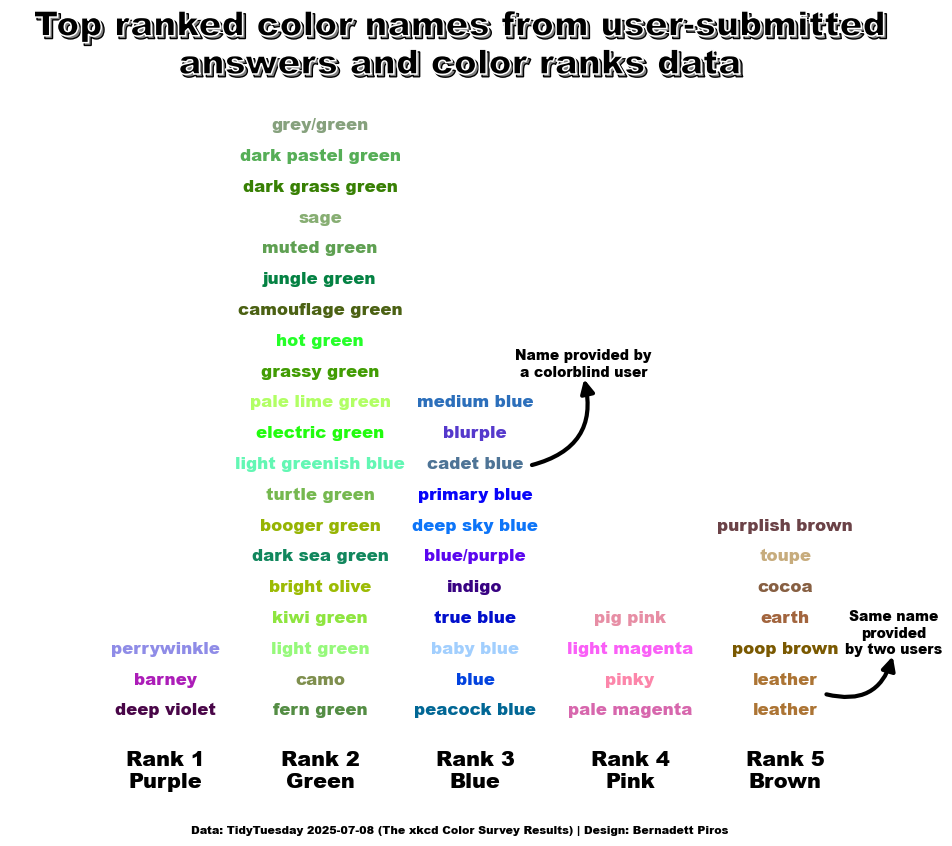

In [12]:
plt.rcParams.update({"font.family": "Arial Black"})

fig, ax = plt.subplots(figsize=(12, 8))

for i, row in df.iterrows():
    ax.text(x=row["rank_answer"],
            y=row["y"],
            s=row["color"],
            color=row["hex"],
            size=12,
            weight="bold",
            ha="center")

ax.set_ylim(0, 20)
ax.set_xlim(0, 6)

location=[1, 2, 3, 4, 5]
labels=["Rank 1\nPurple", "Rank 2\nGreen", "Rank 3\nBlue", "Rank 4\nPink", "Rank 5\nBrown"]
ax.set_xticks(location, labels=labels)

ax.spines[["top", "right", "bottom", "left"]].set_visible(False)
ax.tick_params(length=0)
ax.set_yticks([])

ax.tick_params(
  axis="x",
  labelsize=15  
)

ax_arrow(
  [3.35, 9.1],
  [3.7, 12],
  color="black",
  width=3,
  radius=0.5
)

ax.text(3.7, 12, "Name provided by\na colorblind user", ha="center")

ax_arrow(
  [5.25, 1.7],
  [5.7, 3],
  color="black",
  width=3,
  radius=0.5
)

ax.text(5.7, 3, "Same name\nprovided\nby two users", ha="center")

t = fig.text(0.5, 0.95, "Top ranked color names from user-submitted\nanswers and color ranks data", size=25, ha="center")
t.set_path_effects([
    path_effects.PathPatchEffect(
        offset=(2, -2), facecolor="grey"),
    path_effects.PathPatchEffect(
        edgecolor='white', linewidth=1.1, facecolor="black")])

fig.text(0.5, 0, "Data: TidyTuesday 2025-07-08 (The xkcd Color Survey Results) | Design: Bernadett Piros", size=8, ha="center")

plt.show()

#fig.savefig("2025-07-08.png", bbox_inches='tight', pad_inches=0.2)